In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\DATA\\gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


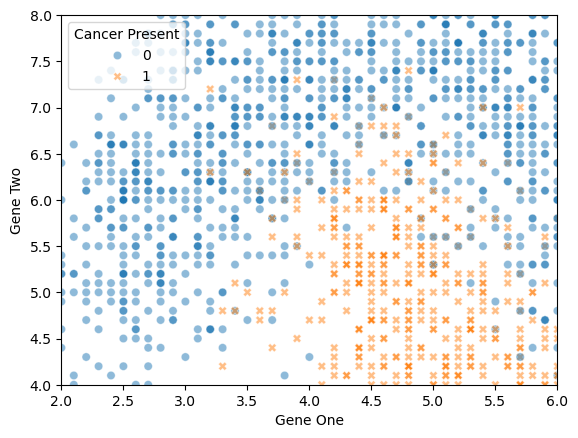

In [4]:
sns.scatterplot(data = df, x = 'Gene One',y = 'Gene Two',
                hue = 'Cancer Present',alpha = 0.5,
               style = 'Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)
plt.show()

In [5]:
len(df)

3000

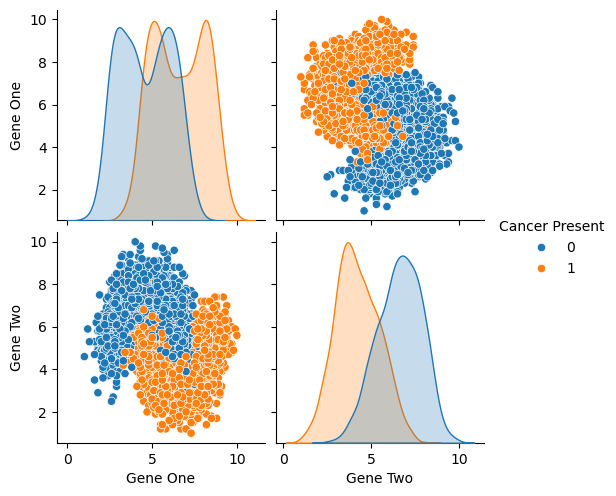

In [6]:
sns.pairplot(df,hue = 'Cancer Present')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop('Cancer Present', axis = 1)
y = df['Cancer Present']

In [13]:
X.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Cancer Present, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
scaler= StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)

In [24]:
scaled_X_test = scaler.transform(X_test)

In [31]:
scaled_X_train

array([[ 0.4441672 ,  0.7149185 ],
       [-0.21108473, -1.66786641],
       [-0.64791935, -0.85423254],
       ...,
       [-0.10187607, -0.97046595],
       [-0.04727175,  1.06361873],
       [ 1.70006673, -0.21494878]])

In [33]:
scaled_X_test

array([[ 1.15402346, -0.73799913],
       [-0.1564804 , -1.49351629],
       [ 1.80927539, -0.67988242],
       ...,
       [ 1.4270451 ,  0.59868509],
       [ 1.15402346, -0.3892989 ],
       [-1.03014964,  1.8772526 ]])

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [39]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
y_pred = knn_model.predict(scaled_X_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [47]:
print(confusion_matrix(y_test,y_pred))

[[426  44]
 [ 45 385]]


In [49]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [51]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [53]:
mean_absolute_error(y_test,y_pred)

0.09888888888888889

In [55]:
errors = []
for k in range (1,40):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    pred = knn_model.predict(scaled_X_test)
    errors.append(mean_absolute_error(y_test,pred))
    

In [56]:
errors

[0.09888888888888889,
 0.09777777777777778,
 0.07333333333333333,
 0.07555555555555556,
 0.07222222222222222,
 0.06444444444444444,
 0.06444444444444444,
 0.06111111111111111,
 0.057777777777777775,
 0.06222222222222222,
 0.06111111111111111,
 0.06,
 0.06111111111111111,
 0.06222222222222222,
 0.058888888888888886,
 0.057777777777777775,
 0.056666666666666664,
 0.05555555555555555,
 0.052222222222222225,
 0.05333333333333334,
 0.05444444444444444,
 0.051111111111111114,
 0.05444444444444444,
 0.05444444444444444,
 0.056666666666666664,
 0.05555555555555555,
 0.05555555555555555,
 0.057777777777777775,
 0.056666666666666664,
 0.052222222222222225,
 0.05555555555555555,
 0.05333333333333334,
 0.05444444444444444,
 0.05333333333333334,
 0.05444444444444444,
 0.05444444444444444,
 0.056666666666666664,
 0.05444444444444444,
 0.05444444444444444]

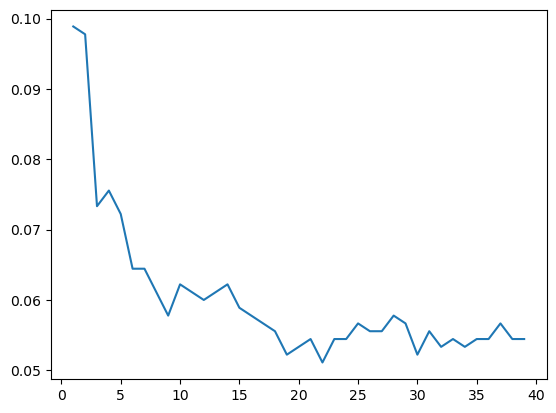

In [57]:
plt.plot(range(1,40),errors)
plt.show()

In [58]:
scaler =StandardScaler()

In [59]:
knn = KNeighborsClassifier()

In [60]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
operations = [('scaler',scaler),('knn',knn)]

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(operations)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
k_values = list(range(1,20))

In [66]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [67]:
param_grid = {'knn__n_neighbours':k_values}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
a = GridSearchCV(pipe,param_grid,cv=5,scoring = 'accuracy')

In [85]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [95]:
from sklearn.model_selection import GridSearchCV

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier()

In [101]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [127]:
grid_model = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring = 'accuracy')

In [109]:
observations = [('scaler',scaler),('knn',knn)]

In [103]:
from sklearn.pipeline import Pipeline

In [121]:
pipe = Pipeline(observations)

In [117]:
param_grid = {'knn__n_neighbors':x_range}

In [115]:
x_range = list(range(1,20))

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]})

In [131]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [133]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=16))])

In [137]:
y_pred = grid_model.predict(X_test)

In [139]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [145]:
grid_model.predict([[3.5,3.4]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)